In [2]:
from datasets import gen_cube
from utils import get_partial_zeros
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


(X, y) = gen_cube(sigma=0.3)

classifier = MLPClassifier(alpha=1, max_iter=1000)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42
    )
#(X_partial_full, y_partial_full, _) = get_partial_zeros(X_train, y_train, num_selected_features=20)


(X_partial, y_partial, _) = get_partial_zeros(X_train, y_train, max_selected_features_percent=0.3)
scaler = StandardScaler()
scaler.fit(X_partial)
X_partial_normalized = scaler.transform(X_partial)
# X_train_partial, X_test_partial, y_train_partial, y_test_partial = train_test_split(
#         X_partial, y_partial, test_size=0.1, random_state=42
#     )

classifier.fit(X_partial_normalized,y_partial)

# classifier.score(X_test, y_test)


MLPClassifier(alpha=1, max_iter=1000)

In [3]:
(X_partial, y_partial, _) = get_partial_zeros(X, y, num_selected_features=20)
classifier.score(scaler.transform(X_partial), y_partial)


0.8652

In [4]:
X_partial[0]

array([0.89419264, 1.1305825 , 0.01739614, 0.04858797, 0.56190217,
       0.3655688 , 0.53141683, 0.8163207 , 0.8297913 , 0.59214526,
       0.67389685, 0.51339996, 0.38469452, 0.49828345, 0.53422356,
       0.48068565, 0.19151014, 0.72183585, 0.8757388 , 0.5908834 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ],
      dtype=float32)

In [4]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import numpy as np 

num_classes = 8
feature_ranking = []
for c in range(num_classes):
    feature_ranking_model = SelectKBest(chi2).fit(X_train-np.min(X_train), y_train==c)
    feature_ranking.append(np.argsort(feature_ranking_model.scores_)[::-1])

general_feature_ranking_model = SelectKBest(chi2).fit(X_train-np.min(X_train), y_train)
general_feature_ranking = np.argsort(feature_ranking_model.scores_)[::-1]

In [55]:
feature_ranking

[array([ 1,  0,  2,  7,  8,  4,  9,  6,  5,  3, 19, 17, 10, 16, 14, 12, 13,
        11, 15, 18]),
 array([ 3,  1,  2,  7,  8,  6,  0,  9,  5,  4, 10, 15, 12, 16, 19, 14, 11,
        13, 17, 18]),
 array([ 4,  3,  2,  7,  8,  6,  9,  5,  0, 10, 12, 17, 11, 15, 13,  1, 14,
        18, 16, 19]),
 array([ 4,  5,  3,  2,  7,  8,  6,  9,  0, 16, 14, 15, 19, 17, 10, 13, 11,
        12, 18,  1]),
 array([ 6,  5,  4,  2,  7,  8,  0,  9,  3, 12, 11, 19, 14, 17,  1, 15, 10,
        13, 16, 18]),
 array([ 5,  6,  7,  2,  8,  0,  4,  9,  3, 16, 17,  1, 10, 11, 19, 14, 18,
        13, 12, 15]),
 array([ 6,  8,  7,  2,  0,  5,  9,  4,  3, 16, 18, 12, 19, 15, 17,  1, 10,
        13, 11, 14]),
 array([ 9,  8,  7,  2,  4,  6,  0,  3,  5, 15, 14,  1, 10, 19, 17, 18, 16,
        13, 11, 12])]

In [54]:
max_features = 10
num_features = X_test.shape[1]

y_pred = []
for x_, y_ in zip(X_test, y_test):
    selected_features = []
    mask = np.zeros(num_features)
    print("y_ = ", y_)
    for i in range(max_features+1):
        observed_x = x_.copy()
        observed_x[mask==0] = 0
        normalized = scaler.transform([np.hstack([observed_x, mask])])
        logits = classifier.predict_proba(normalized)
        
        # probable_class =  np.argmax(np.random.multinomial(1, logits[0], size=1))
        probable_class =  np.argmax(logits)
        print("logits = ", logits)
        print("probable_class = ", probable_class)
        print("selected_features", selected_features)
        selected_feature_ranking = feature_ranking[probable_class]
        for f in selected_feature_ranking:
            if(f not in selected_features):
                selected_features.append(f)
                mask[f]=1
                break
    print("============== NEXT DATA ==================")
    y_pred.append(np.argmax(logits))
        
        
    


y_ =  5
logits =  [[0.11074187 0.13210407 0.11552798 0.12970595 0.13474763 0.13118232
  0.13141041 0.11457977]]
selected_features []
logits =  [[0.01335723 0.0211281  0.01174145 0.01379432 0.00047783 0.44534267
  0.47144773 0.02271067]]
selected_features [6]
logits =  [[0.02850654 0.04571042 0.02334934 0.02629971 0.00092318 0.7348252
  0.13395472 0.00643091]]
selected_features [6, 8]
logits =  [[1.37056361e-02 2.94629422e-02 1.07212666e-02 5.13861625e-04
  4.84441071e-05 8.76948315e-01 6.40871000e-02 4.51243427e-03]]
selected_features [6, 8, 5]
logits =  [[6.66158626e-03 1.33234155e-02 5.21169088e-03 2.49818546e-04
  2.03344425e-05 9.01333596e-01 6.84210424e-02 4.77851578e-03]]
selected_features [6, 8, 5, 7]
logits =  [[1.92404068e-03 3.65233527e-03 1.75263599e-03 2.35835628e-04
  1.40190857e-05 9.05771740e-01 8.22094721e-02 4.43992117e-03]]
selected_features [6, 8, 5, 7, 2]
logits =  [[1.54214267e-04 4.16816646e-03 1.99930804e-03 2.91675249e-04
  1.12185129e-05 8.85121319e-01 1.035705

In [52]:
sum(y_pred == y_test) / len(y_test)

0.875

In [35]:
logits

array([[0.11074187, 0.13210407, 0.11552798, 0.12970595, 0.13474763,
        0.13118232, 0.13141041, 0.11457977]])

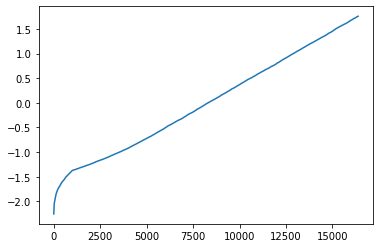

In [38]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# num_features = X_train.shape[1]
# for f in range(num_features):
#     dens = sm.nonparametric.KDEUnivariate(endog=X[:,f])
#     dens.
#     classifier

dens = sm.nonparametric.KDEUnivariate(endog=X_train[:,0])
dens.fit()
plt.plot(dens.icdf)
plt.show()

In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from utils import get_partial_nan

(x_p, y_p, x_c) = get_partial_nan(X_train, y_train)
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(x_p)


/home/ali/.cache/pypoetry/virtualenvs/active-feature-selection-SPu1Tswc-py3.8/lib/python3.8/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(random_state=0)

In [6]:
x_imputed = imp_mean.transform(x_p)
classifier.score(x_imputed, y_p)

0.72832

In [ ]:
from Environment import Env
from datasets import gen_cube

(X, y) = gen_cube()

env = Env(X, y)

env.reset()

: 